In [1]:
import geopandas as gpd
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
 # Folder containing the files
covers_path = "./data/cover/coverl1" 

# List all files in the folder
files = [f for f in os.listdir(covers_path)]

lc1 = {}

for file in files:
    path = os.path.join(covers_path, file)
    gdf = gpd.read_file(path)
    lc1[file] = gdf

In [3]:
 # Folder containing the files
conflict_path = "./data/conflict/enviro/dissolved" 

# List all files in the folder
files = [f for f in os.listdir(conflict_path)]

conflict = {}

for file in files:
    path = os.path.join(conflict_path, file)
    gdf = gpd.read_file(path)
    conflict[file] = gdf

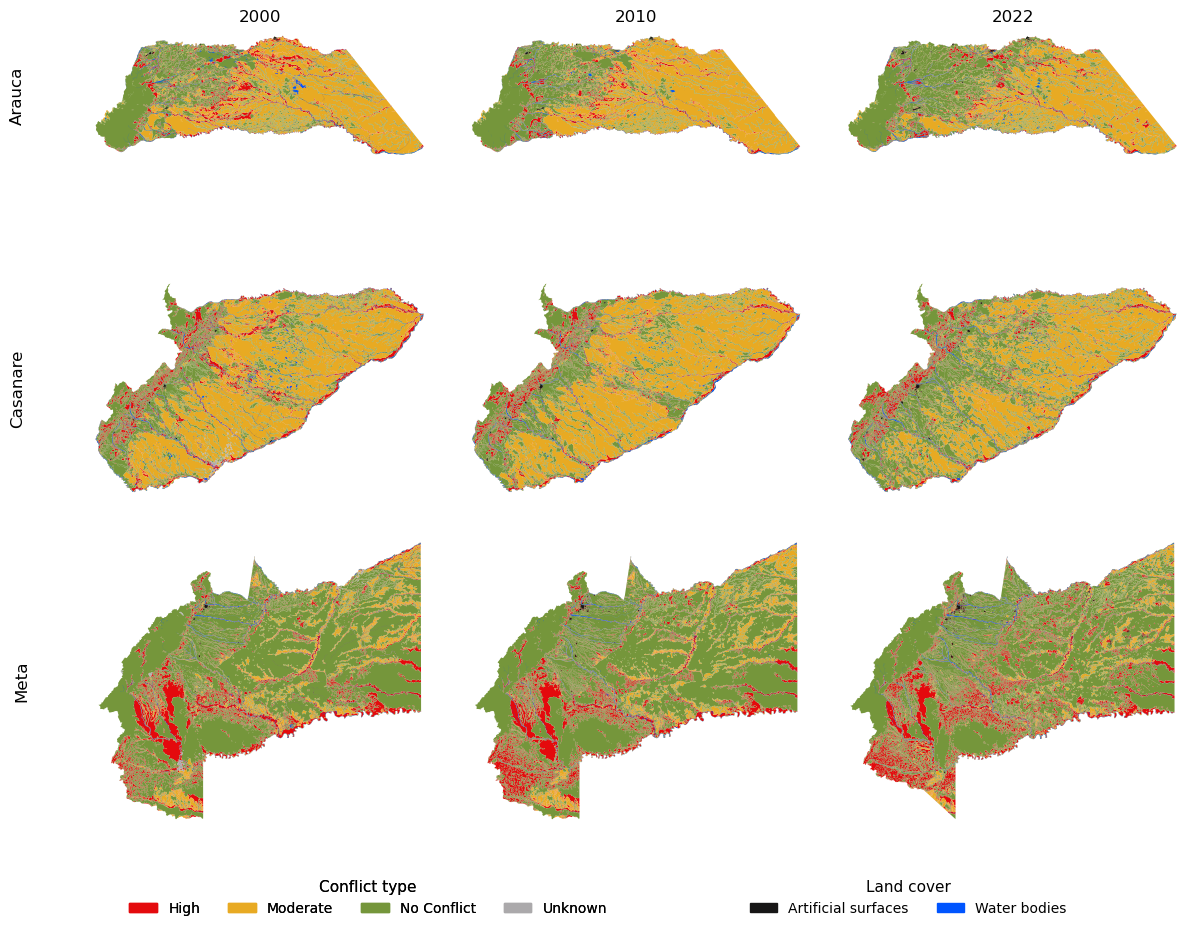

Figure saved as: ./data/conflict/conflict_enviro2.pdf


In [4]:
# Define departments and years
departments = ["ara", "casa", "meta"]
department_labels = {
    "ara": "Arauca",
    "casa": "Casanare",
    "meta": "Meta"
}
years = ["2000", "2010", "2022"]

# Custom color mapping for conflict categories
conflict_colors = {
    "High": "#e40a0d",       
    "Moderate": "#e8aa23",    
    "No Conflict": "#75963b", 
    "Unknown": "#aba9ab"      
}

# Colors for land cover overlays
cover_colors = {
    "Artificial surfaces": "#171616", 
    "Water bodies": "#0055ff"         
}

# Create 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for i, dept in enumerate(departments):
    for j, year in enumerate(years):
        ax = axes[i, j]
        key = f"{dept}_lcvoc_{year}_conflict.gpkg"

        # Skip if missing
        if key not in conflict:
            ax.set_visible(False)
            continue

        # Plot main conflict map
        gdf = conflict[key]
        gdf["color"] = gdf["conflict"].map(conflict_colors)
        gdf.plot(color=gdf["color"], ax=ax)

        # Overlay land cover transparent layers 
        # Identify matching Level 1 land cover file
        lc_key = f"{dept}_cover{year}l1.gpkg"  # adapt to your filename pattern
        if lc_key in lc1:
            lc_gdf = lc1[lc_key]

            # Filter the two classes of interest
            mask = lc_gdf["level1"].isin(["Artificial surfaces", "Water bodies"])
            overlay = lc_gdf[mask].copy()

            # Map colors for overlay
            overlay["color"] = overlay["level1"].map(cover_colors)

            # Plot with transparency (alpha)
            overlay.plot(
                color=overlay["color"],
                ax=ax,
                #alpha=0.3,   # 30% opacity
                edgecolor="none"
            )

        # Labels
        if i == 0:
            ax.set_title(year, fontsize=12)
        if j == 0:
            ax.text(
                -0.15, 0.5, department_labels[dept],
                fontsize=12,
                va="center", ha="right", rotation=90,
                transform=ax.transAxes
            )

        ax.set_axis_off()

# Legend for conflict levels 
legend_patches = [
    mpatches.Patch(color=color, label=label.title())
    for label, color in conflict_colors.items()
]

# Legend for land cover overlays
overlay_patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in cover_colors.items()
]

# First legend: Conflict types 
leg1 = fig.legend(
    handles=legend_patches,
    loc="lower center",
    bbox_to_anchor=(0.30, 0.0),  
    ncol=4,                      
    title="Conflict type",
    fontsize=10,
    title_fontsize=11,
    frameon=False               
)

# Second legend: Land cover 
leg2 = fig.legend(
    handles=overlay_patches,
    loc="lower center",
    bbox_to_anchor=(0.75, 0.0), 
    ncol=2,
    title="Land cover",
    fontsize=10,
    title_fontsize=11,
    frameon=False
)

fig.add_artist(leg1)

plt.tight_layout(rect=[0, 0.08, 1, 1])
output_path = "./data/conflict/conflict_enviro2.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight", dpi=300)
plt.show()
print(f"Figure saved as: {output_path}")
